<a href="https://colab.research.google.com/github/mobarakol/AI_Medical_Imaging/blob/main/UMAP_Practical_Solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UMAP
Installation:

In [2]:
!pip -q install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.7 MB/s eta 0:00:00


MNIST: Digits dataset<br>
<img src="https://datasets.activeloop.ai/wp-content/uploads/2019/12/MNIST-handwritten-digits-dataset-visualized-by-Activeloop.webp" alt="MNIST">

Each Image dimention (8, 8)
Total Dimension: (1797, 64)


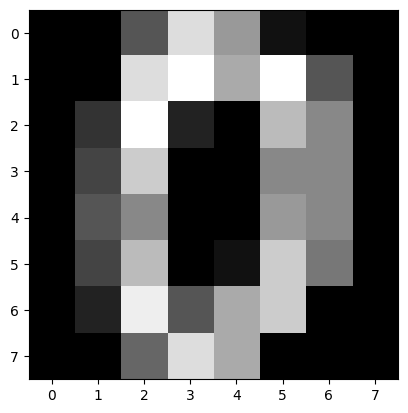

In [3]:
#importing the dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
data = digits.data
print ('Each Image dimention', data[0,:].reshape(8,8).shape)
print('Total Dimension:',data.shape)

#taking a sample image to view
image_sample = data[0,:].reshape(8,8)
plt.imshow(image_sample, cmap='gray')

Apply UMAP to Reduce to 2D

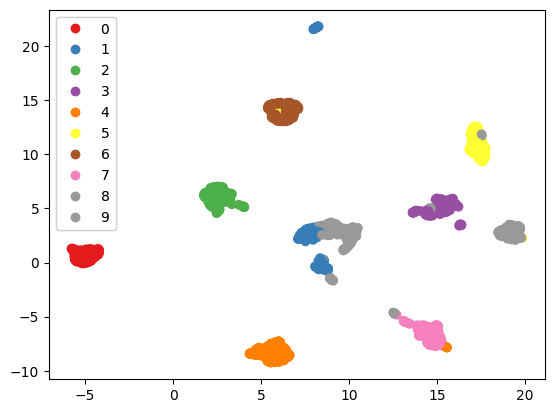

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from umap import UMAP

digits = load_digits()

X_UMAP = UMAP(n_components=2, n_neighbors=15, min_dist=0.1,
                      metric='correlation').fit_transform(digits.data)

fig, ax = plt.subplots()
scatter = ax.scatter(X_UMAP[:,0], X_UMAP[:,1], c=digits.target, cmap='Set1')
legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)
plt.show()
plt.close()


Apply UMAP to Reduce to 3D

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import plotly.express as px
from umap import UMAP

digits = load_digits()

X_UMAP = UMAP(n_components=3, n_neighbors=15, min_dist=0.1,
                      metric='correlation').fit_transform(digits.data)

print('total dimension after UMAP reduction:', X_UMAP.shape)

fig = px.scatter_3d(
    X_UMAP, x=0, y=1, z=2, title='UMAP',width=500, height=500,
    color=digits.target, labels={'color': 'digits'}
)
fig.update_traces(marker_size=8)
fig.show()


total dimension after UMAP reduction: (1797, 3)


# Brain Tumor Dataset
source: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset<br>
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']<br>
number of training MRIs slices = 5712 <br>
number of testing MRIs slices = 1311 <br>

Download the dataset:

In [9]:
import gdown

url = 'https://drive.google.com/uc?id=1Oms9X0Vpid_kN8jiSgz-3MhRA5BcmivE'
gdown.download(url,'braintumor.zip',quiet=True)
!unzip -q braintumor.zip -d braintumor

Visualize some samples:

train sample size: 5712 test sample size: 1311
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
(5712, 784)


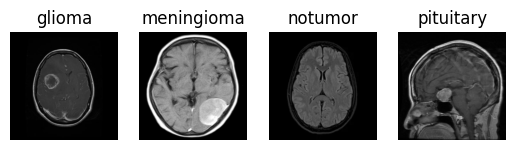

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import datasets

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])
my_transform = transforms.Compose([
        transforms.Resize((28,28)),
        transforms.ToTensor(),
        normalize,
    ])

train_dataset = datasets.ImageFolder(root='/content/braintumor/Training', transform=my_transform)
test_dataset = datasets.ImageFolder(root='/content/braintumor/Testing', transform=my_transform)

print('train sample size:', len(train_dataset), 'test sample size:', len(test_dataset))
print(train_dataset.class_to_idx)

img_all = []
label_all = []
for data, lab in train_dataset:
    img_all.append(np.array(data)[0,:,:])
    label_all.append(lab)

img_all = np.array(img_all).reshape(len(train_dataset),28*28)
label_all = np.array(label_all)
print(img_all.shape)


class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
newsize = (224, 224)
img_glioma = Image.open('braintumor/Testing/glioma/Te-gl_0014.jpg').resize(newsize)
img_meningioma = Image.open('braintumor/Testing/meningioma/Te-me_0017.jpg').resize(newsize)
img_healthy = Image.open('braintumor/Testing/notumor/Te-noTr_0002.jpg').resize(newsize)
img_pituitary = Image.open('braintumor/Testing/pituitary/Te-piTr_0008.jpg').resize(newsize)
plt.subplot(1,4,1), plt.axis('OFF'), plt.title(class_names[0]), plt.imshow(img_glioma)
plt.subplot(1,4,2), plt.axis('OFF'),plt.title(class_names[1]), plt.imshow(img_meningioma)
plt.subplot(1,4,3), plt.axis('OFF'),plt.title(class_names[2]), plt.imshow(img_healthy)
plt.subplot(1,4,4), plt.axis('OFF'),plt.title(class_names[3]), plt.imshow(img_pituitary);

Apply UMAP to Reduce to 2D

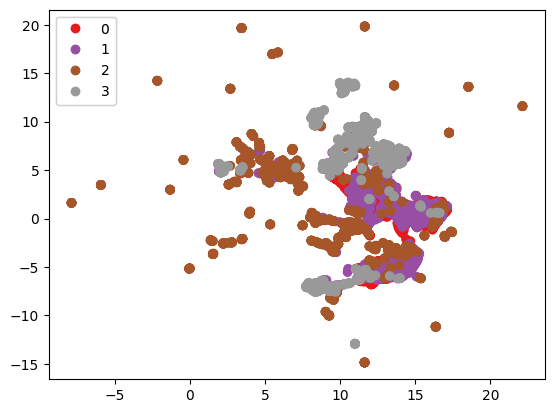

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP

img_all = np.array(img_all).reshape(len(train_dataset),28*28)
label_all = np.array(label_all)

X_UMAP = UMAP(n_components=2, n_neighbors=15, min_dist=0.1,
                      metric='correlation').fit_transform(img_all)

fig, ax = plt.subplots()
scatter = ax.scatter(X_UMAP[:,0], X_UMAP[:,1], c=label_all, cmap='Set1')
legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)
plt.show()
plt.close()

Apply UMAP to reduce to 2D with different number of **n_neighbors** and **min_dist** (n_neighbors=50, min_dist=0.2)

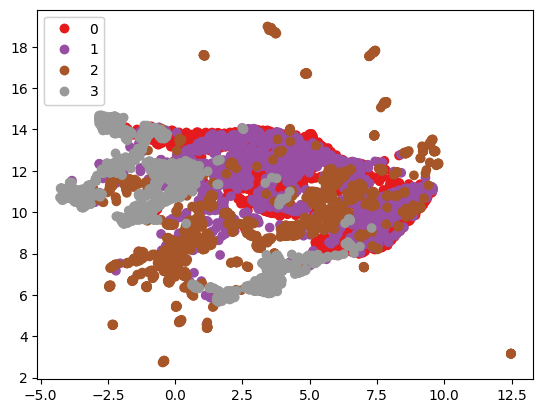

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP

img_all = np.array(img_all).reshape(len(train_dataset),28*28)
label_all = np.array(label_all)

X_UMAP = UMAP(n_components=2, n_neighbors=50, min_dist=0.2,
                      metric='correlation').fit_transform(img_all)

fig, ax = plt.subplots()
scatter = ax.scatter(X_UMAP[:,0], X_UMAP[:,1], c=label_all, cmap='Set1')
legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)
plt.show()
plt.close()

Apply UMAP to Reduce to 3D

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from umap import UMAP

img_all = np.array(img_all).reshape(len(train_dataset),28*28)
label_all = np.array(label_all)

X_UMAP = UMAP(n_components=3, n_neighbors=15, min_dist=0.1,
                      metric='correlation').fit_transform(img_all)

fig = px.scatter_3d(
    X_UMAP, x=0, y=1, z=2, title='UMAP',width=500, height=500,
    color=label_all, labels={'color': 'tumor'}
)
fig.update_traces(marker_size=8)
fig.show()
